In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
d1 = pd.read_csv("sale_price.csv")
d2 = pd.read_csv("customer_feedback.csv")

In [32]:
d1['sale_price'] = d1['sale_price'].replace('[\$,]', '', regex=True).astype(float)

d1['quantity'] = d1['quantity'].fillna(0)

d1['product_id'] = d1['product_id'].astype(str).str.strip()
d2['product_id'] = d2['product_id'].astype(str).str.strip()

In [33]:
d1['revenue'] = d1['sale_price'] * d1['quantity']

product_revenue = (
    d1.groupby('product_id')['revenue']
    .sum()
    .reset_index()
    .sort_values(by='revenue', ascending=False)
)

In [34]:
top5_products = product_revenue.head(5)

print("Top 5 Products by Revenue:\n", top5_products)

Top 5 Products by Revenue:
   product_id  revenue
3       P104  55149.0
0       P101  52072.5
2       P103  46830.0
1       P102  45945.0
4       P105  34161.0


In [35]:
top_ids = top5_products['product_id'].tolist()

top_feedback = d2[d2['product_id'].isin(top_ids)]

avg_sentiment = (
    top_feedback.groupby('product_id')['sentiment_score']
    .mean()
    .reset_index()
)

result = pd.merge(top5_products, avg_sentiment, on='product_id', how='left')

print("\nRevenue and Sentiment for Top 5 Products:\n", result)


Revenue and Sentiment for Top 5 Products:
   product_id  revenue  sentiment_score
0       P104  55149.0         3.054867
1       P101  52072.5         2.880612
2       P103  46830.0         2.900000
3       P102  45945.0         2.999000
4       P105  34161.0         3.035294


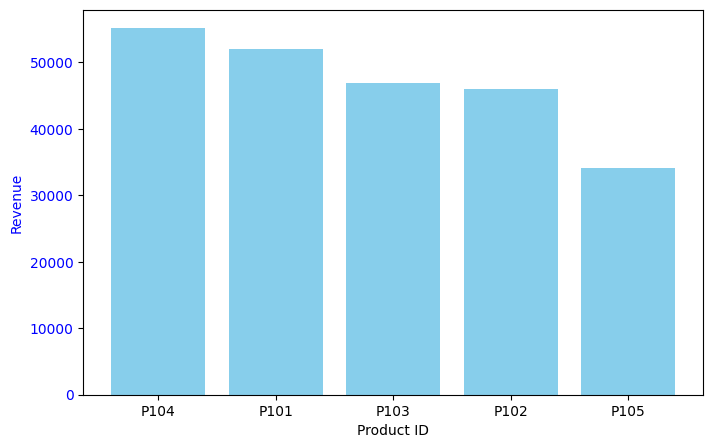

In [39]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.bar(result['product_id'], result['revenue'], color='skyblue', label='Revenue')
ax1.set_xlabel('Product ID')
ax1.set_ylabel('Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')